In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dropout

### Problem statement is prediction of forest fires with neural network

In [3]:
data=pd.read_csv('forestfires.csv')

In [4]:
data1=data.copy()

In [5]:
data1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
data1.drop(['month','day'], axis=1, inplace=True)

In [7]:
data1.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
#### Checking of outlier

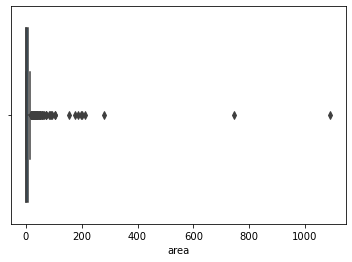

In [9]:
ax=sns.boxplot(data1['area'])

In [10]:
#### As we can see three outlier

In [11]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


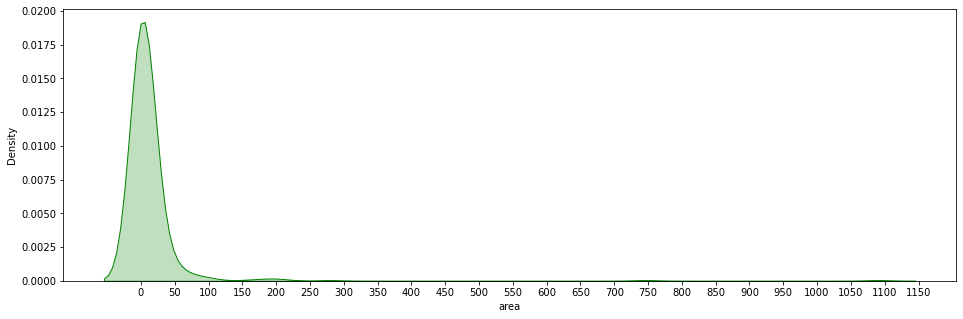

In [12]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(data1['area'].skew()))
print("Kurtosis: {}".format(data1['area'].kurtosis()))
ax = sns.kdeplot(data1['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

In [13]:
#### As we can see the data is highly skewed

### Neural network model

In [14]:
mapping = {'small':1, 'large':2}

In [15]:
data1=data1.replace(mapping)

In [16]:
data1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,2
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,2
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,2
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
x=data1.iloc[:,0:28]
y=data1.iloc[:,28]

In [18]:
def norm_fun(i):
    X=(i-i.min())/(i.max()-i.min())
    return (X)

In [19]:
x_norm=norm_fun(x)

In [20]:
x_train,x_test,y_train,y_test= train_test_split(x_norm,y, test_size=0.30,stratify=y)


In [21]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=28, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [22]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [16,32,64]
epochs = [50,55,60]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=16, epochs=50....................................
[CV 1/5; 1/9] END .....batch_size=16, epochs=50;, score=0.808 total time=   1.8s
[CV 2/5; 1/9] START batch_size=16, epochs=50....................................
[CV 2/5; 1/9] END .....batch_size=16, epochs=50;, score=0.833 total time=   1.7s
[CV 3/5; 1/9] START batch_size=16, epochs=50....................................
[CV 3/5; 1/9] END .....batch_size=16, epochs=50;, score=0.889 total time=   1.7s
[CV 4/5; 1/9] START batch_size=16, epochs=50....................................
[CV 4/5; 1/9] END .....batch_size=16, epochs=50;, score=0.847 total time=   1.7s
[CV 5/5; 1/9] START batch_size=16, epochs=50....................................
[CV 5/5; 1/9] END .....batch_size=16, epochs=50;, score=0.819 total time=   1.7s
[CV 1/5; 2/9] START batch_size=16, epochs=55....................................
[CV 1/5; 2/9] END .....batch_size=16, epochs=55;,

[CV 3/5; 9/9] END .....batch_size=64, epochs=60;, score=0.847 total time=   1.1s
[CV 4/5; 9/9] START batch_size=64, epochs=60....................................
[CV 4/5; 9/9] END .....batch_size=64, epochs=60;, score=0.861 total time=   1.0s
[CV 5/5; 9/9] START batch_size=64, epochs=60....................................
[CV 5/5; 9/9] END .....batch_size=64, epochs=60;, score=0.778 total time=   1.0s


In [24]:
grid_result.best_params_ , grid_result.best_score_

({'batch_size': 16, 'epochs': 60}, 0.8588660597801209)

In [25]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(16,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8 ,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 16,epochs = 60)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.658 total time=   1.8s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.778 total time=   1.9s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.792 total time=   2.1s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.792 total time=   1.9s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.722 total time=   1.9s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [26]:
grid_result.best_params_ , grid_result.best_score_

({'dropout_rate': 0.0, 'learning_rate': 0.01}, 0.8255327224731446)

In [27]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(16,input_dim = 28,kernel_initializer = init,activation = activation_function))

    model.add(Dense(8,kernel_initializer = init,activation = activation_function))

    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,batch_size=16,epochs = 60,verbose = 0)

# Define the grid search parameters




activation_function = ['relu','tanh','linear']
init = ['uniform','normal','zero']


# Make a dictionary of the grid search parameters

param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=relu, init=uniform......................
[CV 1/5; 1/9] END activation_function=relu, init=uniform;, score=0.658 total time=   1.7s
[CV 2/5; 1/9] START activation_function=relu, init=uniform......................
[CV 2/5; 1/9] END activation_function=relu, init=uniform;, score=0.778 total time=   2.0s
[CV 3/5; 1/9] START activation_function=relu, init=uniform......................
[CV 3/5; 1/9] END activation_function=relu, init=uniform;, score=0.778 total time=   1.8s
[CV 4/5; 1/9] START activation_function=relu, init=uniform......................
[CV 4/5; 1/9] END activation_function=relu, init=uniform;, score=0.833 total time=   1.9s
[CV 5/5; 1/9] START activation_function=relu, init=uniform......................
[CV 5/5; 1/9] END activation_function=relu, init=uniform;, score=0.708 total time=   1.8s
[CV 1/5; 2/9] START activation_function=relu, init=normal.......................
[CV 

In [29]:
model = Sequential()
model.add(Dense(16, input_dim=28, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
adam=Adam(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
result=model.fit(x_train,y_train,batch_size=16,epochs=60)

Epoch 1/60
23/23 [==============================] - 0s 1ms/step - loss: 0.0788 - accuracy: 0.7313
Epoch 2/60
23/23 [==============================] - 0s 2ms/step - loss: -4.9655 - accuracy: 0.7313
Epoch 3/60
23/23 [==============================] - 0s 1ms/step - loss: -28.8170 - accuracy: 0.7313
Epoch 4/60
23/23 [==============================] - 0s 2ms/step - loss: -100.5890 - accuracy: 0.7313
Epoch 5/60
23/23 [==============================] - 0s 2ms/step - loss: -254.9557 - accuracy: 0.7313
Epoch 6/60
23/23 [==============================] - 0s 2ms/step - loss: -547.7850 - accuracy: 0.7313
Epoch 7/60
23/23 [==============================] - 0s 2ms/step - loss: -1001.4333 - accuracy: 0.7313
Epoch 8/60
23/23 [==============================] - 0s 2ms/step - loss: -1692.7715 - accuracy: 0.7313
Epoch 9/60
23/23 [==============================] - 0s 2ms/step - loss: -2630.9116 - accuracy: 0.7313
Epoch 10/60
23/23 [==============================] - 0s 2ms/step - loss: -3898.7021 - accuracy

In [43]:
y_pred= model.predict(x_test)

5/5 [==============================] - 0s 2ms/step


In [50]:
y_predict=np.asarray(y_pred).astype("int32")

In [36]:
from sklearn.metrics import classification_report

In [57]:
result=classification_report(y_test,y_predict,output_dict=True)

In [59]:
result.keys()

dict_keys(['1', '2', 'accuracy', 'macro avg', 'weighted avg'])

In [63]:
print("Accuracy",np.round(result["accuracy"]*100,2),"%")

Accuracy 73.08 %
